In [29]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt


In [30]:

path = kagglehub.dataset_download("zeesolver/consumer-behavior-and-shopping-habits-dataset")
path

'/Users/nicolasyassuda/.cache/kagglehub/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/versions/1'

In [31]:
data_csv = pd.read_csv(f'{path}/shopping_behavior_updated.csv')

In [32]:
data_csv.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [33]:
data_csv.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [49]:
null_counts = data_csv.isnull().sum()

null_counts

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

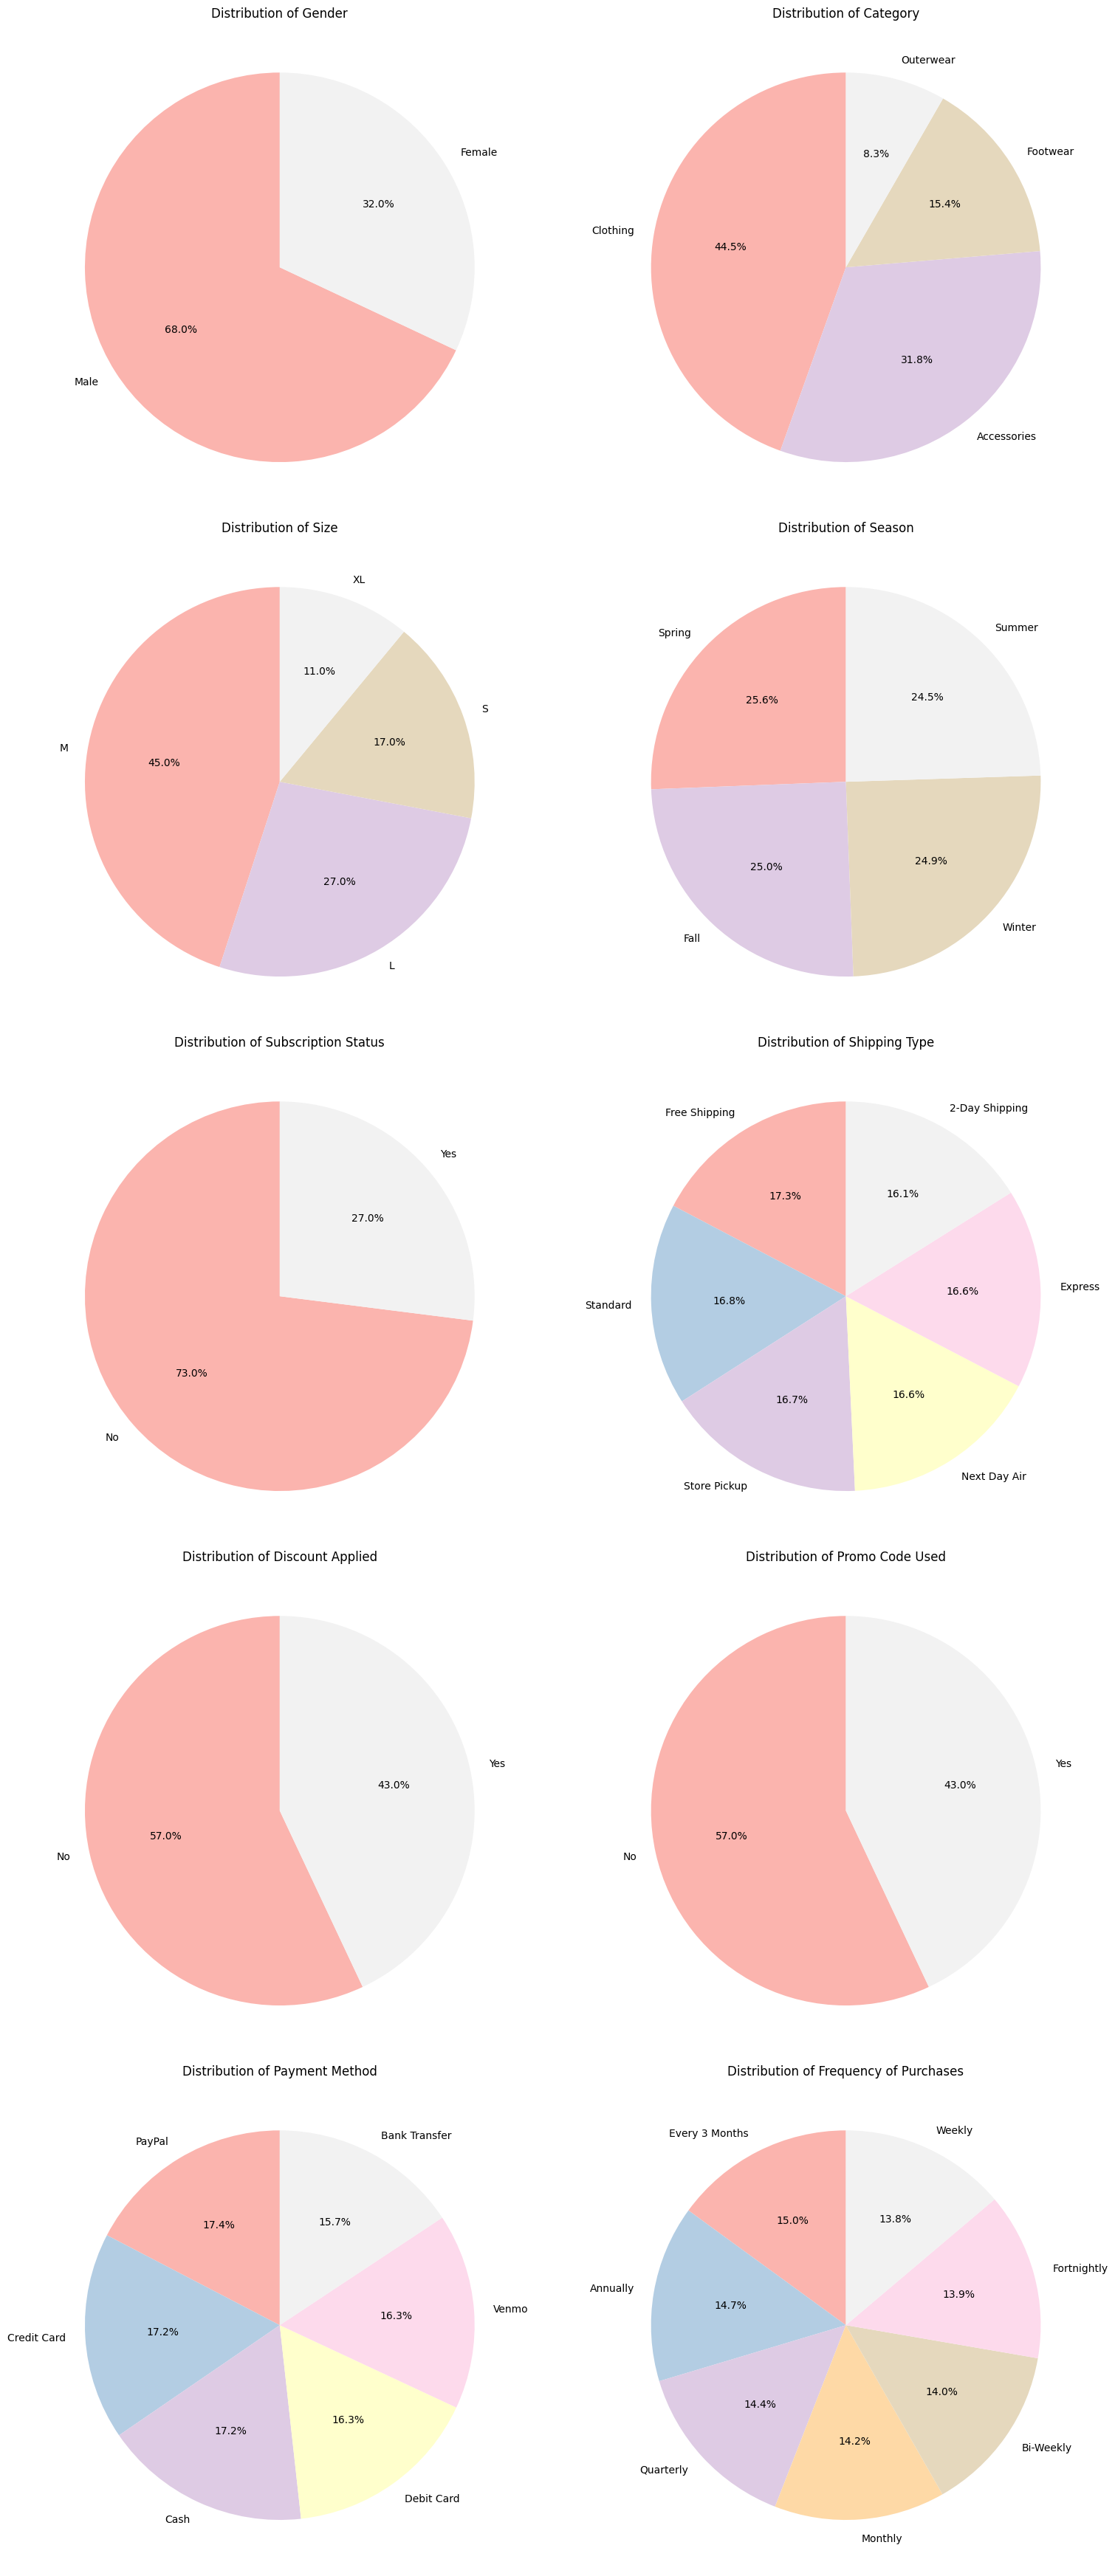

In [ ]:
categorical_cols = data_csv.select_dtypes(include=['object', 'category']).columns

cols_to_plot = [col for col in categorical_cols if data_csv[col].nunique() <= 10]
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 7 * n_rows))
axes = axes.flatten() if len(cols_to_plot) > 1 else [axes]

for idx, col in enumerate(cols_to_plot):
    value_counts = data_csv[col].value_counts()
    value_counts.plot.pie(
        ax=axes[idx], 
        autopct='%1.1f%%', 
        startangle=90, 
        cmap='Pastel1', 
        legend=False
    )
    axes[idx].set_ylabel('')
    axes[idx].set_title(f'Distribution of {col}')

for ax in axes[len(cols_to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

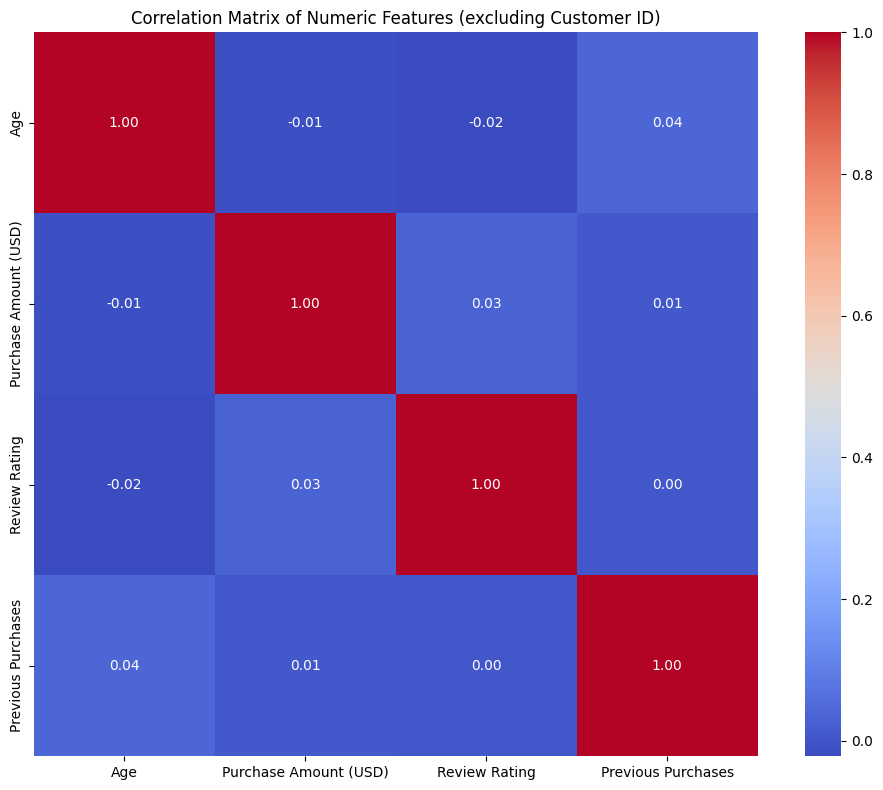

In [37]:
numeric_cols = data_csv.select_dtypes(include=['number']).drop(columns=["Customer ID"], errors="ignore")
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features (excluding Customer ID)')
plt.tight_layout()
plt.show()


Com base na análise realizada, é possível observar que os dados apresentam características adequadas para serem utilizados em processos de clusterização. Caso todos os valores estivessem excessivamente concentrados ou demasiadamente dispersos, isso poderia comprometer a performance dos modelos que aplicaremos na etapa de agrupamento. Dessa forma, é viável prosseguir com o procedimento de clusterização para investigar posteriormente o comportamento de cada cluster e entender os fatores que contribuem para essas diferenças.